[[11169     0     0     0     0     0     0     0     0     0]
 [    0     0     0    17     1    32   310     0     0     0]
 [    0     0    26     0     0     5   362     0     0     0]
 [    0     0     0  2719     2   338   511     0     0     0]
 [    0     0     0    58    20    67    88     0     0     0]
 [    0     0     0   100     0  1329   652     0     0    17]
 [    0     0     0   472    33   164  6085     2     0    16]
 [    0     0     0    81     3    87  2178     7     0    14]
 [    0     0     0     2     0     1    21     0     0     1]
 [    0     0     0    29     0    12   149     0     0  7889]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       0.00      0.00      0.00       360
           2       1.00      0.07      0.12       393
           3       0.78      0.76      0.77      3570
           4       0.34      0.09      0.14       233
           5       0.65      0.63      0.64 

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


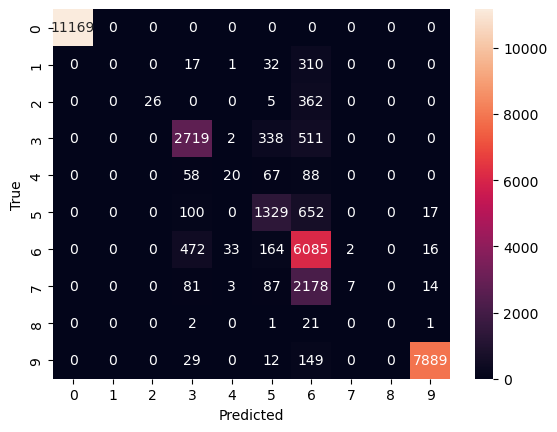

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# Langkah 1: Memuat dataset
data = pd.read_csv('UNSW_NB15_training-set.csv')

# Langkah 2: Preprocessing
# Mengkodekan fitur kategorikal
categorical_features = ['proto', 'service', 'state']
label_encoders = {col: LabelEncoder() for col in categorical_features}
for col in categorical_features:
    data[col] = label_encoders[col].fit_transform(data[col])

# Mengkodekan kolom target 'attack_cat'
label_encoder = LabelEncoder()
data['attack_cat'] = label_encoder.fit_transform(data['attack_cat'])

# Skalasi fitur numerik
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('attack_cat')  # Jangan skalakan kolom target 'attack_cat'
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Langkah 3: Memisahkan data
X = data.drop(['attack_cat', 'id'], axis=1)  # Hapus 'id' jika tidak diperlukan
y = data['attack_cat']                        # Label target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 4: Setup Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(kernel='linear'))
])

# Langkah 5: Evaluasi model
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Langkah 6: Visualisasi confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
